In [242]:
# Libraries for Data Analysis
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# Libraries for Graphical Interpretations
# ! pip install plotnine

from plotnine import *

In [161]:
# pip install fredapi
from fredapi import Fred
fred = Fred(api_key = '2d063b4e6530724ac4a200b65467a14b')

### Monthly Macro Economics Data - Preprocessing
#### Source FRED ST.Louis/OECD
#### Loading the Data

In [162]:

# Inflation 
# Monthly 10-year Breakeven Inflation Rate(Monthly)
BEI_M = fred.get_series('T10YIEM', observation_start='1/1/2003', observation_end='12/1/2017')
BEI_M = pd.DataFrame(BEI_M, columns=['breakeven_inflation']) # Renaming the Column


# CPI
# Monthly Energy CPI for US (2003 2017)
ENGCPI_M = fred.get_series('USACPIENGMINMEI', observation_start='1/1/2003', observation_end='12/1/2017')
ENGCPI_M = pd.DataFrame(ENGCPI_M, columns=['CPI for Energy']) # Renaming the Column


# Money Supply M2
# Monthly Money Supply M2 for US (2003 - 2019)
M2 = fred.get_series('M2SL', observation_start='1/1/2003', observation_end='12/1/2017')
M2_M = pd.DataFrame(M2, columns=['M2SL in Billions of Dollars'])


# ACDGNO 
#Monthly Value of Manufacturers' New Orders for Consumer Goods: Consumer Durable Goods Industries (ACDGNO)
ACDGNO = fred.get_series('ACDGNO', observation_start='1/1/2003', observation_end='12/1/2017')
ACDGNO_M = pd.DataFrame(ACDGNO, columns=['ACDGNO in Million of Dollars']) 


# POILWTIUSDM
# Monthly Global price of WTI Crude
Global_Crude_M = fred.get_series('POILWTIUSDM', observation_start='1/1/2003', observation_end='12/1/2017')
Global_Crude_M = pd.DataFrame(Global_Crude_M, columns=['Global Price U.S. Dollars per Barrel'])


# NATURALGASD11
# Monthly Natural Gas Consumption
gas_consumption_M = fred.get_series('NATURALGASD11', observation_start='1/1/2003', observation_end='12/1/2017')
Gas_Cnsmp_M = pd.DataFrame(gas_consumption_M, columns=['NG Consumption Billion Cubic Feet'])




In [163]:
# Concatenating the dataframes
macro_data_monthly = pd.concat([BEI_M, ENGCPI_M, M2_M, ACDGNO_M, Global_Crude_M, Gas_Cnsmp_M], axis = 'columns')

In [164]:
macro_data_monthly = pd.DataFrame(macro_data_monthly)
macro_data_monthly.reset_index(inplace = True)
macro_data_monthly = macro_data_monthly.rename(columns = {'index': 'date'})
macro_data_monthly.date = macro_data_monthly.date.dt.to_period('M')
macro_data_monthly.set_index('date', inplace = True)
macro_data_monthly.shape

(180, 6)

### Loading and preprocessing the Crude & Oil Futures Contract

In [165]:
# Monthly Crude and Natural Gas Futures Contracts
crude_gas_monthly = pd.read_csv('./load_macro_var_and_csvfiles/crude_gas_monthly_zlu.csv')
crude_gas_monthly = crude_gas_monthly.drop('yearmon', axis = 'columns')

crude_gas_monthly = pd.DataFrame(crude_gas_monthly)
crude_gas_monthly = crude_gas_monthly.rename(columns = {'Date': 'date'})
crude_gas_monthly['date'] = pd.to_datetime(crude_gas_monthly['date'])
crude_gas_monthly.date = crude_gas_monthly.date.dt.to_period('M')
crude_gas_monthly.set_index('date', inplace = True)

In [166]:
# Extracting the log and difference of the Futures Contract values
crude_gas_monthly = np.log(crude_gas_monthly).diff().dropna()
crude_gas_monthly.shape

(179, 8)

#### Loading the Monthly Consumer Price Index (CPI) Inflation of Energy

In [167]:
# Loading the Monthly Consumer Price Index (CPI) Inflation of Energy
inflation_cpi_M = pd.read_csv('./load_macro_var_and_csvfiles/Inflation(CPI)_Energy_US_M.csv')
inflation_cpi_M['date'] = pd.to_datetime(inflation_cpi_M['date'])
inflation_cpi_M.date = inflation_cpi_M.date.dt.to_period('M')
inflation_cpi_M = pd.DataFrame(inflation_cpi_M)
inflation_cpi_M.set_index('date', inplace = True)
inflation_cpi_M.shape

# Loading the Monthly Short-Term Interest Rate 
interest_rate_M = pd.read_csv('./load_macro_var_and_csvfiles/interest_rate_shortterm_US_M.csv')
interest_rate_M['date'] = pd.to_datetime(interest_rate_M['date'])
interest_rate_M.date = interest_rate_M.date.dt.to_period('M')
interest_rate_M = pd.DataFrame(interest_rate_M)
interest_rate_M.set_index('date', inplace = True)
interest_rate_M.shape

(180, 1)

(180, 1)

#### Concatenating the Macros DataFrames

In [168]:
macro_monthly = pd.concat([inflation_cpi_M, interest_rate_M, macro_data_monthly], axis = 'columns')
macro_monthly

,inflation_rate,interest_rate,breakeven_inflation,CPI for Energy,M2SL in Billions of Dollars,ACDGNO in Million of Dollars,Global Price U.S. Dollars per Barrel,NG Consumption Billion Cubic Feet
date,,,,,,,,
2003-01,14.145030,1.29,1.76,62.840385,5793.0,34936.0,32.915217,1937.9
2003-02,21.981980,1.27,1.91,66.734025,5829.2,34336.0,35.852500,2029.8
2003-03,23.356400,1.23,1.87,70.282659,5849.9,34082.0,33.315714,1865.7
2003-04,13.011460,1.24,1.78,68.064763,5887.1,33536.0,28.328182,1833.6
2003-05,9.031734,1.22,1.66,66.044013,5947.3,34324.0,28.201818,1823.0
2003-06,9.287430,1.04,1.61,67.276177,5984.0,34353.0,30.710000,1689.5
2003-07,9.003984,1.05,1.87,67.424037,6030.6,36246.0,30.734348,1807.7
2003-08,11.764710,1.08,2.13,69.296927,6088.7,33995.0,31.583810,1836.4
2003-09,14.670900,1.08,2.08,71.268390,6060.8,36628.0,28.433182,1801.2


In [169]:
# Joining the datasets
macro_monthly_final = crude_gas_monthly.join(macro_monthly, how = 'left')
macro_monthly_final.shape
macro_monthly_final.head()

(179, 16)

,"Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)",Natural Gas Futures Contract 1 (Dollars per Million Btu),Natural Gas Futures Contract 2 (Dollars per Million Btu),Natural Gas Futures Contract 3 (Dollars per Million Btu),Natural Gas Futures Contract 4 (Dollars per Million Btu),inflation_rate,interest_rate,breakeven_inflation,CPI for Energy,M2SL in Billions of Dollars,ACDGNO in Million of Dollars,Global Price U.S. Dollars per Barrel,NG Consumption Billion Cubic Feet
date,,,,,,,,,,,,,,,,
2003-02,0.088204,0.061882,0.045490,0.035650,0.368328,0.127362,0.136288,0.142801,21.981980,1.27,1.91,66.734025,5829.2,34336.0,35.852500,2029.8
2003-03,-0.164772,-0.176653,-0.164926,-0.145847,-0.470621,-0.174283,-0.118934,-0.095753,23.356400,1.23,1.87,70.282659,5849.9,34082.0,33.315714,1865.7
2003-04,-0.184902,-0.136718,-0.109622,-0.094804,0.062251,0.069124,0.074387,0.066848,13.011460,1.24,1.78,68.064763,5887.1,33536.0,28.328182,1833.6
2003-05,0.136048,0.112445,0.092827,0.081694,0.149124,0.143772,0.133350,0.136986,9.031734,1.22,1.66,66.044013,5947.3,34324.0,28.201818,1823.0
2003-06,0.021089,0.043948,0.053327,0.055263,-0.144308,-0.145970,-0.138262,-0.108082,9.287430,1.04,1.61,67.276177,5984.0,34353.0,30.710000,1689.5


### Monthly Stock Data - Preprocessing

In [170]:
# Loading the Monthly Stock Data
stock_data_monthly = pd.read_csv('./Time_series_data/stock_data.csv')




stock_data_monthly['date'] = pd.to_datetime(stock_data_monthly['date'])
stock_data_monthly.set_index('date', inplace = True)

In [171]:
stock_data_monthly = stock_data_monthly['2003-02':]
stock_data_monthly = stock_data_monthly.reset_index()


# Making the date column of stock data into 'Year-Month' format
stock_data_monthly.date = stock_data_monthly.date.dt.to_period('M')

stock_data_monthly.set_index('date', inplace = True)

In [172]:
stock_data_monthly.dtypes
stock_data_monthly.shape

comnam        object
ticker        object
permno         int64
permco         int64
vol          float64
shrout         int64
mv_permco    float64
ret1         float64
F1ret        float64
prc          float64
year           int64
month          int64
logsize      float64
L1ret_1      float64
L1ret_6      float64
L1ret_11     float64
dtype: object

(6324, 16)

In [173]:
macro_monthly_dataset = stock_data_monthly.join(macro_monthly_final, how = 'left')
macro_monthly_dataset.shape
macro_monthly_dataset

(6324, 32)

,comnam,ticker,permno,permco,vol,shrout,mv_permco,ret1,F1ret,prc,year,month,logsize,L1ret_1,L1ret_6,L1ret_11,"Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)",Natural Gas Futures Contract 1 (Dollars per Million Btu),Natural Gas Futures Contract 2 (Dollars per Million Btu),Natural Gas Futures Contract 3 (Dollars per Million Btu),Natural Gas Futures Contract 4 (Dollars per Million Btu),inflation_rate,interest_rate,breakeven_inflation,CPI for Energy,M2SL in Billions of Dollars,ACDGNO in Million of Dollars,Global Price U.S. Dollars per Barrel,NG Consumption Billion Cubic Feet
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-02,AMERADA HESS CORP,AHC,28484,20064,173069.0,89201,3972.12000,-0.056568,0.000674,44.529999,2003,2,8.287055,-0.142598,-3.031146e-01,-0.306754,0.088204,0.061882,0.045490,0.035650,0.368328,0.127362,0.136288,0.142801,21.981980,1.27,1.91,66.734025,5829.2,34336.0,35.852500,2029.8
2003-02,APACHE CORP,APA,39490,20204,367027.0,152251,9938.94500,0.045986,-0.006939,65.279999,2003,2,9.204216,0.096859,2.160317e-01,0.191560,0.088204,0.061882,0.045490,0.035650,0.368328,0.127362,0.136288,0.142801,21.981980,1.27,1.91,66.734025,5829.2,34336.0,35.852500,2029.8
2003-02,CHEVRONTEXACO CORP,CVX,14541,20440,572540.0,1068157,68543.63000,0.007298,0.007480,64.169998,2003,2,11.135230,-0.031288,-1.244405e-01,-0.216085,0.088204,0.061882,0.045490,0.035650,0.368328,0.127362,0.136288,0.142801,21.981980,1.27,1.91,66.734025,5829.2,34336.0,35.852500,2029.8
2003-02,EQUITABLE RESOURCES INC,EQT,24328,20662,48806.0,62497,2268.64100,-0.019096,0.033333,36.299999,2003,2,7.726936,0.061073,9.797720e-02,0.154131,0.088204,0.061882,0.045490,0.035650,0.368328,0.127362,0.136288,0.142801,21.981980,1.27,1.91,66.734025,5829.2,34336.0,35.852500,2029.8
2003-02,EXXON MOBIL CORP,XOM,11850,20678,2206165.0,6700000,227934.00000,0.002928,0.027337,34.020000,2003,2,12.336810,-0.022610,-5.879390e-02,-0.157433,0.088204,0.061882,0.045490,0.035650,0.368328,0.127362,0.136288,0.142801,21.981980,1.27,1.91,66.734025,5829.2,34336.0,35.852500,2029.8
2003-02,RANGE RESOURCES CORP,RRC,50017,2706,28979.0,54769,324.78020,0.013675,-0.037100,5.930000,2003,2,5.783148,0.083333,1.515748e-01,0.258064,0.088204,0.061882,0.045490,0.035650,0.368328,0.127362,0.136288,0.142801,21.981980,1.27,1.91,66.734025,5829.2,34336.0,35.852500,2029.8
2003-02,MARATHON OIL CORP,MRO,15069,21795,274398.0,309864,7154.76000,0.115790,0.038112,23.090000,2003,2,8.875533,-0.018319,-1.197687e-01,-0.217608,0.088204,0.061882,0.045490,0.035650,0.368328,0.127362,0.136288,0.142801,21.981980,1.27,1.91,66.734025,5829.2,34336.0,35.852500,2029.8
2003-02,MURPHY OIL CORP,MUR,28345,21236,89533.0,91640,3943.26900,0.024407,0.026493,43.029999,2003,2,8.279765,-0.015169,2.453100e-02,-0.007480,0.088204,0.061882,0.045490,0.035650,0.368328,0.127362,0.136288,0.142801,21.981980,1.27,1.91,66.734025,5829.2,34336.0,35.852500,2029.8
2003-02,NOBLE ENERGY INC,NBL,61815,3219,76525.0,57291,2022.37200,-0.010084,-0.028612,35.299999,2003,2,7.612027,-0.049268,1.508990e-01,-0.010526,0.088204,0.061882,0.045490,0.035650,0.368328,0.127362,0.136288,0.142801,21.981980,1.27,1.91,66.734025,5829.2,34336.0,35.852500,2029.8


In [174]:
drop_columns = ['comnam', 'permno', 'permco', 'year', 'month']
macro_monthly_dataset = macro_monthly_dataset.drop(columns = drop_columns)
macro_monthly_dataset.columns

Index(['ticker', 'vol', 'shrout', 'mv_permco', 'ret1', 'F1ret', 'prc',
       'logsize', 'L1ret_1', 'L1ret_6', 'L1ret_11',
       'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
       'Natural Gas Futures Contract 1 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 2 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 3 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 4 (Dollars per Million Btu)',
       'inflation_rate', 'interest_rate', 'breakeven_inflation',
       'CPI for Energy', 'M2SL in Billions of Dollars',
       'ACDGNO in Million of Dollars', 'Global Price U.S. Dollars per Barrel',
       'NG Consumption Billion Cubic Feet'],
      dtype='object')

## Exploratory Data Analysis

In [175]:
macro_monthly_dataset.shape
macro_monthly_dataset.columns
macro_monthly_dataset.dtypes

(6324, 27)

Index(['ticker', 'vol', 'shrout', 'mv_permco', 'ret1', 'F1ret', 'prc',
       'logsize', 'L1ret_1', 'L1ret_6', 'L1ret_11',
       'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
       'Natural Gas Futures Contract 1 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 2 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 3 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 4 (Dollars per Million Btu)',
       'inflation_rate', 'interest_rate', 'breakeven_inflation',
       'CPI for Energy', 'M2SL in Billions of Dollars',
       'ACDGNO in Million of Dollars', 'Global Price U.S. Dollars per Barrel',
       'NG Consumption Billion Cubic Feet'],
      dtype='object')

ticker                                                           object
vol                                                             float64
shrout                                                            int64
mv_permco                                                       float64
ret1                                                            float64
F1ret                                                           float64
prc                                                             float64
logsize                                                         float64
L1ret_1                                                         float64
L1ret_6                                                         float64
L1ret_11                                                        float64
Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)    float64
Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)    float64
Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)    

In [176]:
skew = macro_monthly_dataset.ret1.skew()
print('Target skew is:', skew )

Target skew is: 1.214002464808205


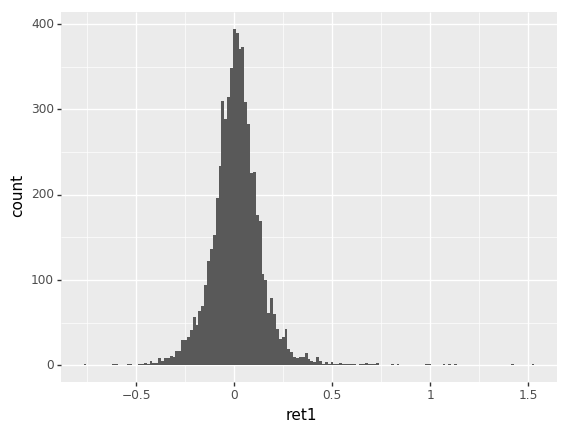

<ggplot: (-9223371881007486506)>

In [177]:
(ggplot(macro_monthly_dataset)
 + aes(x='ret1')    
 + geom_histogram(size=20) 
)

In [178]:
# Calculating Correlation Coeff
col_names = list(macro_monthly_dataset.select_dtypes(exclude = 'object').columns)
skew_dir = {}
for col in col_names:
    skew_col = macro_monthly_dataset['ret1'].corr(macro_monthly_dataset[col])
    skew_dir.update({col : skew_col})
print(pd.DataFrame.from_dict(skew_dir, orient='index'))
    

                                                           0
vol                                                -0.036906
shrout                                             -0.014670
mv_permco                                          -0.003613
ret1                                                1.000000
F1ret                                               0.051388
prc                                                 0.052832
logsize                                            -0.001277
L1ret_1                                             0.051316
L1ret_6                                             0.000012
L1ret_11                                           -0.023605
Cushing, OK Crude Oil Future Contract 1 (Dollar...  0.493768
Cushing, OK Crude Oil Future Contract 2 (Dollar...  0.502692
Cushing, OK Crude Oil Future Contract 3 (Dollar...  0.506442
Cushing, OK Crude Oil Future Contract 4 (Dollar...  0.509590
Natural Gas Futures Contract 1 (Dollars per Mil...  0.256011
Natural Gas Futures Cont

#### Analysis for dropping features
 - mv_permco: means the market capitalization of the company. 'mv_permco' is the exponential of the 'logsize'. 
 - F1ret: means 1 lead of the current month's returns which incorporates future information that can't be used in predicting the 'logsize_y'. 
 - L1ret_6: means return over 6 months lag by 1 month, which can be dropped as it doesn't provide much intuition in addition to the 'L1ret_1'.
 - L1ret_11: means return over 11 months lag by 1 month, which can be dropped as it doesn't provide much intuition in addition to the 'L1ret_1'.
 - logsize: means the log of the 'mv_permco'. 

#### Dropping the above listed variables 

In [179]:
drop_cols = ['mv_permco', 'F1ret', 'L1ret_6', 'L1ret_11', 'logsize']
macro_monthly_dataset = macro_monthly_dataset.drop(columns = drop_cols)

In [180]:
macro_monthly_dataset.dtypes

ticker                                                           object
vol                                                             float64
shrout                                                            int64
ret1                                                            float64
prc                                                             float64
L1ret_1                                                         float64
Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)    float64
Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)    float64
Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)    float64
Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)    float64
Natural Gas Futures Contract 1 (Dollars per Million Btu)        float64
Natural Gas Futures Contract 2 (Dollars per Million Btu)        float64
Natural Gas Futures Contract 3 (Dollars per Million Btu)        float64
Natural Gas Futures Contract 4 (Dollars per Million Btu)        

### Boxcox transformation and Standardization 

In [181]:
#finding skewness in numerical features:
numerics = macro_monthly_dataset.select_dtypes(exclude = 'object').columns
skewed_feats = pd.DataFrame(macro_monthly_dataset[numerics].skew().sort_values(ascending = False))
skewed_feats

,0
shrout,4.509813
vol,3.875871
interest_rate,1.367919
L1ret_1,1.222708
ret1,1.214002
prc,1.066982
Global Price U.S. Dollars per Barrel,0.234527
M2SL in Billions of Dollars,0.177788
NG Consumption Billion Cubic Feet,0.122301
Natural Gas Futures Contract 1 (Dollars per Million Btu),-0.052114


In [182]:
skewed_feats = skewed_feats[abs(skewed_feats[0]) > 0.75] #filtered out high skew

skewed_feats

,0
shrout,4.509813
vol,3.875871
interest_rate,1.367919
L1ret_1,1.222708
ret1,1.214002
prc,1.066982
breakeven_inflation,-1.224768


In [183]:
# Boxcox Transformation
from scipy.special import boxcox1p
skews = skewed_feats.index
print(skews)
lmda = 0.15
for feat in skews:
    macro_monthly_dataset[feat] = boxcox1p(macro_monthly_dataset[feat], lmda)


Index(['shrout', 'vol', 'interest_rate', 'L1ret_1', 'ret1', 'prc',
       'breakeven_inflation'],
      dtype='object')


In [184]:
numerics = macro_monthly_dataset.select_dtypes(exclude = 'object').columns
skewed_feats_1 = pd.DataFrame(macro_monthly_dataset[numerics].skew().sort_values(ascending = False))
skewed_feats_1

,0
interest_rate,0.954209
shrout,0.929039
vol,0.238880
Global Price U.S. Dollars per Barrel,0.234527
M2SL in Billions of Dollars,0.177788
NG Consumption Billion Cubic Feet,0.122301
Natural Gas Futures Contract 1 (Dollars per Million Btu),-0.052114
Natural Gas Futures Contract 2 (Dollars per Million Btu),-0.150457
L1ret_1,-0.190393
ret1,-0.193648


### Standardization of the dataset

In [185]:
standardized = macro_monthly_dataset.drop(columns='ret1').groupby('ticker').transform(lambda x: (x - x.mean()) / x.std())
macro_monthly_dataset = pd.concat([macro_monthly_dataset.iloc[:,0], standardized, macro_monthly_dataset['ret1']],  axis = 1, join = 'inner')

### Missingness and Imputation

In [186]:
macro_monthly_dataset.isna().sum()

ticker                                                           0
vol                                                              0
shrout                                                           0
prc                                                              0
L1ret_1                                                         30
Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)     0
Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)     0
Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)     0
Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)     0
Natural Gas Futures Contract 1 (Dollars per Million Btu)         0
Natural Gas Futures Contract 2 (Dollars per Million Btu)         0
Natural Gas Futures Contract 3 (Dollars per Million Btu)         0
Natural Gas Futures Contract 4 (Dollars per Million Btu)         0
inflation_rate                                                   0
interest_rate                                                 

In [187]:
# Imputing the missing values of 'ret1'
macro_monthly_dataset['ret1'] = macro_monthly_dataset['ret1'].fillna(macro_monthly_dataset.groupby('ticker')['ret1'].transform('mean'))

In [188]:
macro_monthly_dataset['L1ret_1'] = macro_monthly_dataset['ret1'].shift(periods=1)

In [189]:

macro_monthly_dataset['L1ret_1'] = macro_monthly_dataset['L1ret_1'].fillna(-0.011607)

In [190]:
macro_monthly_dataset.isna().sum()


ticker                                                          0
vol                                                             0
shrout                                                          0
prc                                                             0
L1ret_1                                                         0
Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)    0
Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)    0
Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)    0
Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)    0
Natural Gas Futures Contract 1 (Dollars per Million Btu)        0
Natural Gas Futures Contract 2 (Dollars per Million Btu)        0
Natural Gas Futures Contract 3 (Dollars per Million Btu)        0
Natural Gas Futures Contract 4 (Dollars per Million Btu)        0
inflation_rate                                                  0
interest_rate                                                   0
breakeven_

In [191]:
macro_monthly_dataset.shape
len(macro_monthly_dataset['ticker'].unique())

(6324, 22)

44

In [192]:
dict_hedgers = {'COG': 14,'CRK': 5,'CXO': 10,'APA': 9,'SWN': 14,'WTI': 10,'RRC': 14,'WLL': 14,'CLR': 8,'MRO': 12,
'PETD': 6, 'LPI': 6,'WPX': 6,'OXY': 8,'APC': 14,'DNR': 11,'SM': 12,'MTDR': 5,'GPOR': 8,'QEP': 5,'OAS': 7,'DVN': 13,
'HES': 9,'CPE': 12,'CRZO': 10,'AREX': 10,'NBL': 8,'UNT': 12,'PDCE': 5,'COP': 4,'EOG': 12,'XEC': 10,'PXD': 11,'NOG': 7,
'PE': 3,'CRC': 2,'CHK': 14}

In [193]:
# List of the independent & integrated companies

integrated = ['BP', 'CVE', 'CVX', '386', 'ECOPETL', 'ENI', 'EQNR', 'XOM', 'GALP', 'HSE', 'IMO', 
              'MOL', 'OMV', '857', 'PETR4','REP', 'RDSA', 'SU', 'FP', 'YPFD'] 

independent = ['APC', 'AR', 'APA', 'AREX', 'COG', 'CPE', 'CRZO', 'CHK', 'XEC', 'CRK', 'CXO', 'COP', 'CLR',
                'CRC', 'DNR', 'DVN', 'FANG', 'ECA', 'EOG', 'EPEG', 'EQT', 'XCOOQ', 'XOG', 'GDPMQ', 'GPOR', 
                'HKRSQ', 'HES', 'LPI', 'LINEQ', 'MRO', 'MTDR', 'MUR', 'NBL', 'NOG', 'OAS', 'OXY', 'PDCE', 
                'PXD', 'PE', 'QEP', 'RRC', 'SNEC', 'SM', 'SWN', 'UPLMQ', 'UNT', 'WTI', 'WLL', 'WPX']

## Modelling

In [194]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

import warnings
warnings.filterwarnings("ignore")

### Non-hedge-integrated 

In [195]:
hedger_list = list(dict_hedgers.keys())

non_hedge_monthly = macro_monthly_dataset[~macro_monthly_dataset.ticker.isin(hedger_list)]
non_hedge_monthly_integrated = non_hedge_monthly[non_hedge_monthly.ticker.isin(integrated)]
non_hedge_monthly_independent = non_hedge_monthly[non_hedge_monthly.ticker.isin(independent)]

print('non_hedge_monthly_independent: ', non_hedge_monthly_independent['ticker'].unique())
print('non_hedge_monthly_integrated: ', non_hedge_monthly_integrated['ticker'].unique())

non_hedge_monthly_independent:  ['EQT' 'MUR' 'ECA' 'AR']
non_hedge_monthly_integrated:  ['CVX' 'XOM']


In [196]:
NT_X = non_hedge_monthly_integrated.loc[:, ~non_hedge_monthly_integrated.columns.isin(['ret1' , 'ticker']) ]
NT_y = non_hedge_monthly_integrated['ret1']

#### Lasso Regression ( Non-hedge-integrated ) 

In [198]:
# Lasso Regression
lasso = Lasso(normalize=False)
tss = TimeSeriesSplit(5)

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

model = GridSearchCV(lasso, param_grid=param_grid, cv=tss).fit(NT_X,NT_y)
lasso_ = Lasso(normalize = False, alpha = model.best_params_['alpha']).fit(NT_X, NT_y)

print('R-square: ', lasso_.score(NT_X, NT_y))
print('intercept: ', lasso_.intercept_)
list(zip(NT_X.columns, lasso_.coef_))

R-square:  0.3352522529818216
intercept:  0.008768743236015248


[('vol', -0.0040290357265168235),
 ('shrout', 0.0033568823769182313),
 ('prc', 0.010179884046303055),
 ('L1ret_1', 0.04928293400498927),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)', -0.0),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  0.019824303943097855),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)', 0.0),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  0.004222608467584059),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)', 0.0),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)', -0.0),
 ('inflation_rate', -0.0),
 ('interest_rate', 0.0),
 ('breakeven_inflation', -0.0020393559954523504),
 ('CPI for Energy', -0.0056366384706360816),
 ('M2SL in Billions of Dollars', -0.0027298564012398665),
 ('ACDGNO in Million of Dollars', 0.00015316464393221046),

### Non-hedge-independent

In [199]:
ND_X = non_hedge_monthly_independent.loc[:, ~non_hedge_monthly_independent.columns.isin(['ret1' , 'ticker']) ]
ND_y = non_hedge_monthly_independent['ret1']

#### Lasso Regression (Non-hedge-independent)

In [201]:
# Lasso Regression (Non-hedge-monthly-independent)
lasso = Lasso(normalize=False)
tss = TimeSeriesSplit(5)

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

model = GridSearchCV(lasso, param_grid=param_grid, cv=tss).fit(ND_X,ND_y)
lasso_ = Lasso(normalize = False, alpha = model.best_params_['alpha']).fit(ND_X, ND_y)

print('R-square: ', lasso_.score(ND_X, ND_y))
print('intercept: ', lasso_.intercept_)
list(zip(ND_X.columns, lasso_.coef_))

R-square:  0.48499936861668685
intercept:  0.0012938657735822837


[('vol', -0.0),
 ('shrout', -0.0),
 ('prc', 0.007535160528944616),
 ('L1ret_1', 0.27785925501853154),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  0.02759889471809099),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)', -0.0),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  0.014684136235942159),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)', 0.0),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)', -0.0),
 ('inflation_rate', -0.0),
 ('interest_rate', 0.0),
 ('breakeven_inflation', -0.0026107547139528125),
 ('CPI for Energy', -0.0011205567922908217),
 ('M2SL in Billions of Dollars', -0.0004232341373790271),
 ('ACDGNO in Million of Dollars', -0.0),
 ('Global Price U.S. Dollars per Barrel', -0.00549241

### Semi-hedge

In [202]:
hedge_ratio = pd.read_csv('./hedge_ratio.csv')

hedge_ratio = hedge_ratio[hedge_ratio['hedge_ratio'] <= 1]
meanhedge_ticker = dict(hedge_ratio.groupby('ticker')['hedge_ratio'].mean())
hedger = [i for i,j in meanhedge_ticker.items() if j >= 0.5]
semihedger = [i for i,j in meanhedge_ticker.items() if (j < 0.5) & (j >= 0.1)]


In [203]:

semi_hedge_monthly = macro_monthly_dataset[macro_monthly_dataset.ticker.isin(semihedger)]
semi_hedge_monthly_integrated = semi_hedge_monthly[semi_hedge_monthly.ticker.isin(integrated)]
semi_hedge_monthly_independent = semi_hedge_monthly[semi_hedge_monthly.ticker.isin(independent)]

print('semi_hedge_monthly_independent: ', semi_hedge_monthly_independent['ticker'].unique())
print('semi_hedge_monthly_integrated: ', semi_hedge_monthly_integrated['ticker'].unique())

semi_hedge_monthly_independent:  ['APA' 'MRO' 'APC']
semi_hedge_monthly_integrated:  []


In [204]:
SD_X = semi_hedge_monthly_independent.loc[:, ~semi_hedge_monthly_independent.columns.isin(['ret1' , 'ticker']) ]
SD_y = semi_hedge_monthly_independent['ret1']

#### Lasso Regression (Semi-hedge-independent)

In [206]:
# Lasso Regression (Semi-hedge-monthly-independent )
lasso = Lasso(normalize=False)
tss = TimeSeriesSplit(5)

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

model = GridSearchCV(lasso, param_grid=param_grid, cv=tss).fit(SD_X,SD_y)
lasso_ = Lasso(normalize = False, alpha = model.best_params_['alpha']).fit(SD_X, SD_y)

print('Rsq: ', lasso_.score(SD_X, SD_y))
print('intercept: ', lasso_.intercept_)
list(zip(SD_X.columns, lasso_.coef_))

Rsq:  0.4733663523577605
intercept:  0.00423514181903115


[('vol', -0.0007612559207010087),
 ('shrout', 0.0),
 ('prc', 0.014929982881390918),
 ('L1ret_1', 0.22683666406244626),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  0.041678251008882845),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)',
  0.00022541343806105617),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  0.006152399044240769),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)', -0.0),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)',
  -0.0030620611417057513),
 ('inflation_rate', -0.00209919192833014),
 ('interest_rate', -0.0006520221691570826),
 ('breakeven_inflation', -0.005300492889393124),
 ('CPI for Energy', -0.00533701999043761),
 ('M2SL in Billions of Dollars', -0.0),
 ('ACDGNO in Million 

### Hedgers

In [207]:

hedge_monthly = macro_monthly_dataset[macro_monthly_dataset.ticker.isin(hedger)]
hedge_monthly_integrated = hedge_monthly[hedge_monthly.ticker.isin(integrated)]
hedge_monthly_independent = hedge_monthly[hedge_monthly.ticker.isin(independent)]

print('hedge_monthly_independent: ', hedge_monthly_independent['ticker'].unique())
print('hedge_monthly_integrated: ', hedge_monthly_integrated['ticker'].unique())

hedge_monthly_independent:  ['RRC' 'SWN' 'UNT' 'ECA' 'CLR' 'PDCE']
hedge_monthly_integrated:  []


In [208]:
HD_X = hedge_monthly_independent.loc[:, ~hedge_monthly_independent.columns.isin(['ret1' , 'ticker']) ]
HD_y = hedge_monthly_independent['ret1']

#### Lasso Regression (Hedger-independent)

In [210]:
# Lasso Regression (Hedger-monthly-independent)
lasso = Lasso(normalize=False)
tss = TimeSeriesSplit(5)

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

model = GridSearchCV(lasso, param_grid=param_grid, cv=tss).fit(HD_X,HD_y)
lasso_ = Lasso(normalize = False, alpha = model.best_params_['alpha']).fit(HD_X, HD_y)

print('R-square: ', lasso_.score(HD_X, HD_y))
print('intercept: ', lasso_.intercept_)
list(zip(HD_X.columns, lasso_.coef_))

R-square:  0.3993147404171862
intercept:  0.006602549537926538


[('vol', -0.0036755010367836988),
 ('shrout', -0.0044529082340380045),
 ('prc', 0.010088067751299152),
 ('L1ret_1', 0.26492424537399034),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  0.04530905673469095),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)', 0.0),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  0.018320862847439348),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)', 0.0),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)', -0.0),
 ('inflation_rate', -0.0),
 ('interest_rate', 0.0),
 ('breakeven_inflation', -0.0027690520711461937),
 ('CPI for Energy', -0.00605838388988628),
 ('M2SL in Billions of Dollars', -0.00196025589846949),
 ('ACDGNO in Million of Dollars', 0.0),
 ('Global Price U.S. Do

## Moving Average Exogenous (MAX) Model 
- #### for the "hedge_monthly_independent" companies (which has most samples)
- #### Basically, MAX is MA + linear regression

In [261]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'

In [212]:
# NT_X for exog variables (variables with postivie coefficients not dropped by Lasso)
HD_X = hedge_monthly_independent.loc[:, ~hedge_monthly_independent.columns.isin(['ret1' , 'ticker']) ]\
                       [['prc', 'Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
                        'Natural Gas Futures Contract 2 (Dollars per Million Btu)']]

HD_y = hedge_monthly_independent['ret1']

In [213]:
HD_X.index=HD_X.index.to_timestamp()

In [214]:
HD_y.index=HD_y.index.to_timestamp()

In [215]:
print(HD_X.index)
print(HD_y.index)

DatetimeIndex(['2003-02-01', '2003-02-01', '2003-02-01', '2003-02-01',
               '2003-03-01', '2003-03-01', '2003-03-01', '2003-03-01',
               '2003-04-01', '2003-04-01',
               ...
               '2017-11-01', '2017-11-01', '2017-11-01', '2017-11-01',
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01'],
              dtype='datetime64[ns]', name='date', length=910, freq=None)
DatetimeIndex(['2003-02-01', '2003-02-01', '2003-02-01', '2003-02-01',
               '2003-03-01', '2003-03-01', '2003-03-01', '2003-03-01',
               '2003-04-01', '2003-04-01',
               ...
               '2017-11-01', '2017-11-01', '2017-11-01', '2017-11-01',
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01'],
              dtype='datetime64[ns]', name='date', length=910, freq=None)


- Stationarity Check for hedge_monthly_independent return
  - Stationarity condition 
    - Trend Stationary 
    - Variance is Constant
    - Autocorrelation is Constant

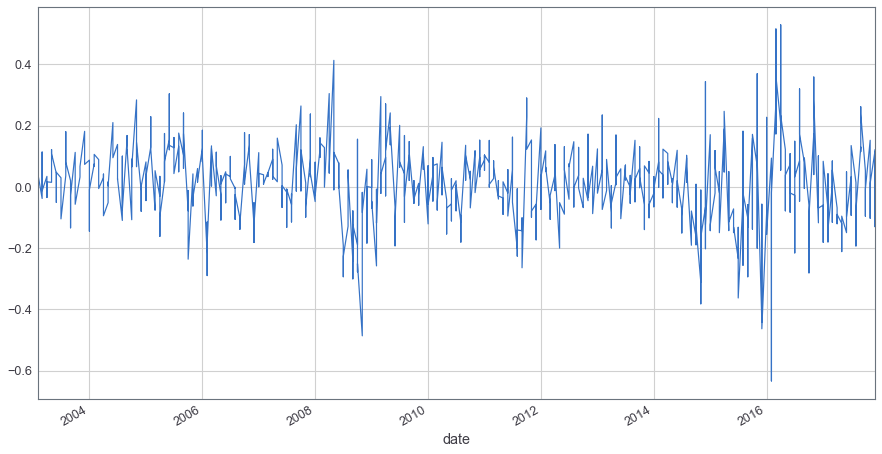

In [216]:
fig, ax = plt.subplots(figsize = (15,8))
HD_y.plot(ax = ax)
plt.show()

- First of all, we can see that the mean of the time series is not centered around 0
. So we will have to add a Intercept term in the Model

- Hypothesis testing for Stationarity: Augmented Dickey-Fuller (ADF)
   - Null Hypothesis: Time Series is Non-stationary 
   - Alternative Hypothesis: Stationary

In [217]:
results = adfuller(HD_y)
p_value = results[1]
print('p value', p_value, 'is very small, which means that time series is stationary')

p value 1.2251894668893045e-08 is very small, which means that time series is stationary


#### ACF, PACF correlogram to identify the optimal order

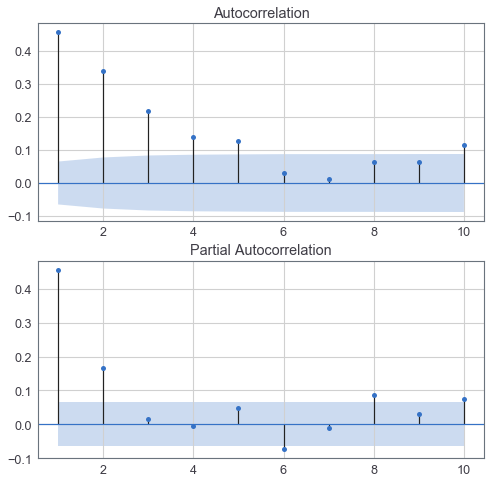

In [263]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (8,8) )
plot_acf(HD_y, lags = 10, zero = False, ax = ax1)
plot_pacf(HD_y, lags = 10, zero = False, ax = ax2)
plt.show()

- Above, if there is a spike over the critical band, it indicates that Autocorrelation exists (Alternative Hypothesis) and vice versa

In the Correlograms, neither ACF or PACF smoothly tails off.
 
- However,
  
   - "Lag1"~"Lag5" successively exceeds the critical band for ACF.
   - "Lag1"~"Lag2" successively exceeds the critical band for PACF. 

So we can search for the best model, using the information criterion.
- Note that ACF is used for determining the order of Moving Average: MA(q) and PACF is used for Autoregressive model: AR(p).
- Since AIC is better for choosing a predictive model, using AIC as a information crieterion instead of BIC is generally preferrable.
- Candidates for AR order: Lag0 ~ Lag2
- Candidates for MA order: Lag0 ~ Lag5


In [266]:
for p in range(0,2): # Loop over AR order
    for q in range(0,6): # Loop over MA order
        try:
            results = SARIMAX(HD_y, order = (p,0,q), trend = 'c').fit()
            print(p,q, results.aic, results.bic)
        except:
            print(p,q,None,None)

0 0 -1202.6139089719702 -1192.9870197729483
0 1 -1346.3220273141794 -1331.8816935156467
0 2 -1408.625260315672 -1389.3714819176284
0 3 -1421.7951040655635 -1397.727881068009
0 4 -1422.3609942533494 -1393.480326656284
0 5 -1440.9994120955384 -1407.3052998989622
1 0 -1413.3268576970531 -1398.8865238985204
1 1 -1435.1585984206174 -1415.9048200225739
1 2 -1434.4404310281816 -1410.3732080306272
1 3 -1432.708482217476 -1403.8278146204107
1 4 -1431.0962538328113 -1397.402141636235
1 5 -1439.328125320264 -1400.820568524177


- ##### Model Selection: MA(5) model of "p = 0, q = 5" returns the lowest AIC. (Generally, for predictive models: AIC)

#### Comparison of MA(5) and MAX(5) in terms of Mean Absolute Error (MAE)

In [220]:
# MA(5)
model_ma = SARIMAX(HD_y, order = (0,0,5), trend = 'c')
result_ma = model_ma.fit()
residuals_ma= result_ma.resid
mae_ma = np.mean(np.abs(residuals_ma))
# MAX(5)
model_max = SARIMAX(HD_y, order = (0,0,5), trend = 'c', exog = HD_X)
result_max = model_max.fit()
residuals_max= result_max.resid
mae_max = np.mean(np.abs(residuals_max))
# Comparison
print('MA(5) MAE:', mae_ma)
print('MAX(5) MAE:', mae_max)
print('')
print('*Select MAX(5) due to its has lower MAE.')

MA(5) MAE: 0.08079862748548594
MAX(5) MAE: 0.07195114400701595

*Select MAX(5) due to its has lower MAE.


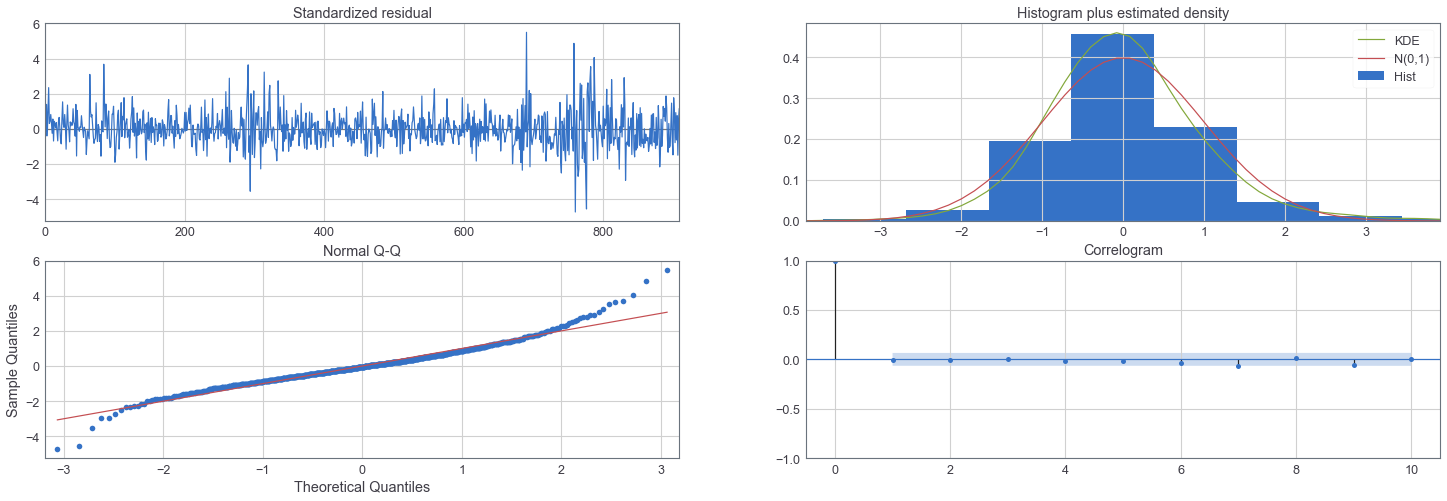

In [268]:
result_max.plot_diagnostics( figsize = (25 ,8))
plt.show()

- In the above plots, although the Kernel Density Estimation is not ideal, the Normal Q-Q plot and Correlogram for the residual are fine. Thus this model can be considered of being tested.

In [223]:
insample_test_entry = int(HD_y.shape[0]*0.7) - HD_y.shape[0] 
print(insample_test_entry)

-273


In [270]:
forecast = result_max.get_prediction(start = insample_test_entry, steps=5)
# start argument specifies how many steps back to begin the forecast. In this case, last 108 entries.
# This is a in-sample forecast
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [271]:
mean_forecast

date
2014-03-01    0.009152
2014-03-01    0.028972
2014-03-01    0.018408
2014-04-01    0.072825
2014-04-01    0.062473
2014-04-01    0.062226
2014-04-01    0.022620
2014-04-01    0.035742
2014-04-01    0.007153
2014-05-01    0.053411
2014-05-01    0.026881
2014-05-01    0.026404
2014-05-01    0.011493
2014-05-01    0.013166
2014-05-01   -0.020536
2014-06-01    0.042961
2014-06-01    0.057392
2014-06-01    0.017104
2014-06-01   -0.000289
2014-06-01    0.027532
2014-06-01    0.039999
2014-07-01   -0.050849
2014-07-01   -0.064690
2014-07-01   -0.095093
2014-07-01   -0.085417
2014-07-01   -0.079653
2014-07-01   -0.083889
2014-08-01    0.017862
2014-08-01    0.025600
2014-08-01    0.029610
2014-08-01    0.033477
2014-08-01    0.023807
2014-08-01    0.011516
2014-09-01    0.003746
2014-09-01   -0.047411
2014-09-01   -0.084573
2014-09-01   -0.075686
2014-09-01   -0.057930
2014-09-01   -0.089379
2014-10-01   -0.096280
2014-10-01   -0.099524
2014-10-01   -0.086023
2014-10-01   -0.081874
2014-1

In [272]:
confidence_intervals

,lower ret1,upper ret1
date,,
2014-03-01,-0.182166,0.200470
2014-03-01,-0.162346,0.220290
2014-03-01,-0.172910,0.209726
2014-04-01,-0.118493,0.264143
2014-04-01,-0.128846,0.253791
2014-04-01,-0.129092,0.253545
2014-04-01,-0.168698,0.213938
2014-04-01,-0.155576,0.227061
2014-04-01,-0.184165,0.198471


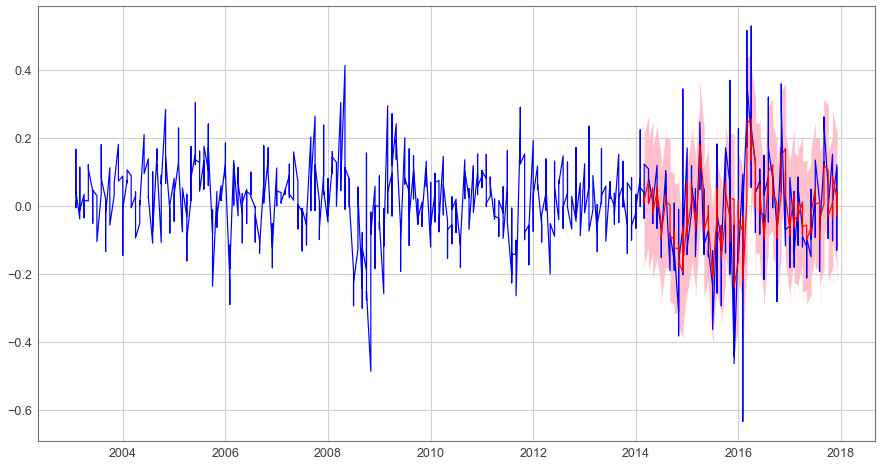

In [273]:
plt.figure(figsize = (15,8))
plt.plot(HD_y.index, HD_y.values, color = 'blue', )
plt.plot(mean_forecast.index, mean_forecast.values, color = 'red', label = 'forecast')

plt.fill_between(confidence_intervals.index,  confidence_intervals.reset_index()['lower ret1'], 
                  confidence_intervals.reset_index()['upper ret1'], color = 'pink')

plt.show()

- In the plot above, a considerable number of actual data are in the prediction interval, which indicates that MAX(5) model can be effective to a certain extent. However, it is true that some observations are not within the prediction interval.

### Future Works
- Thus, for future work, instead of focusing on predicting the returns, we can focus on discovering the correlation between their volatilities. If the variances of return are correlated, those are forecastable. Then we can consider using the GARCH(1,1) model which is also frequently used in finance.  

GARCH = Generalized Autoregressive Conditional Heteroskedasticity : Current uncertainty/variance is not only driven by the recent surprise but also the most recent uncertaintly/variance.

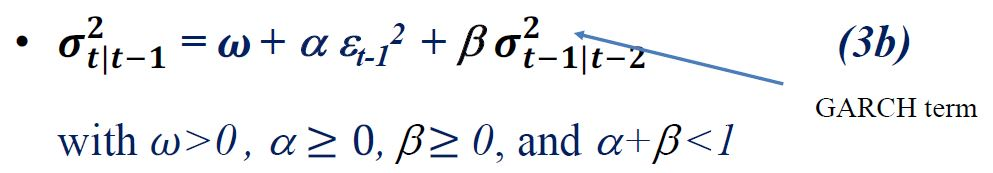

In [248]:
from IPython.core.display import display
from IPython.display import Image
Image(filename='GARCH11.jpg', width = 600)